In [3]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priyadharshini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv(r'C:\Users\priyadharshini\Desktop\github\CartEase-chatbot\data\expanded_chatbot_data.csv',)

print("Null values:", df.isnull().sum())

print(f"Total samples: {len(df)}")
print(f"Unique intents: {df['intent'].nunique()}")
print(df['intent'].value_counts())



Null values: question    0
intent      0
dtype: int64
Total samples: 300
Unique intents: 6
intent
product_availability    50
payment_methods         50
order_status            50
cancel_order            50
shipping_info           50
return_policy           50
Name: count, dtype: int64


# Step 1: Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
 
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_question'] = df['question'].apply(clean_text)
df[['question', 'cleaned_question']].head()


,question,cleaned_question
0,Can I preorder this product?,preorder product
1,Can I pay with UPI?,pay upi
2,Has my order shipped yet?,order ship yet
3,Order hasn’t arrived yet,order hasn’t arriv yet
4,Can I track my order?,track order


In [ ]:

X = df['cleaned_question']
y = df['intent']

vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Added bigrams
X_vec = vectorizer.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Step 2: Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_encoded, test_size=0.2, random_state=42)


# step 3: Model Training

In [8]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 1.00


c:\Users\priyadharshini\Desktop\github\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:45:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# step 4: Classification Report and confusion matrix

Classification Report:
                      precision    recall  f1-score   support

        cancel_order       1.00      1.00      1.00         7
        order_status       1.00      1.00      1.00        10
     payment_methods       1.00      1.00      1.00        12
product_availability       1.00      1.00      1.00        13
       return_policy       1.00      1.00      1.00        10
       shipping_info       1.00      1.00      1.00         8

            accuracy                           1.00        60
           macro avg       1.00      1.00      1.00        60
        weighted avg       1.00      1.00      1.00        60



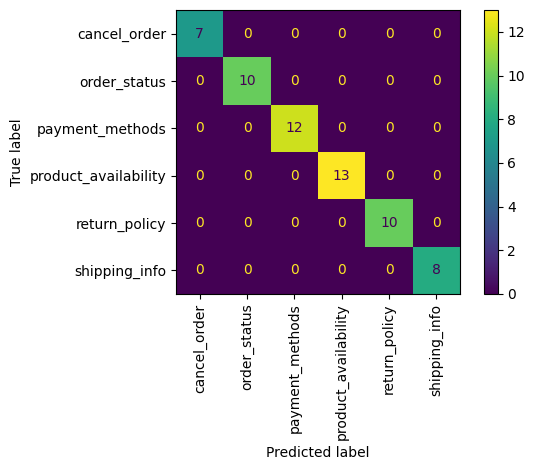

In [9]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_, xticks_rotation='vertical')
plt.tight_layout()
plt.show()


# step 5: Save vectorizer, label encoder, and model

In [10]:
import pickle

# Save vectorizer, label encoder, and model
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("chatbot_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model and preprocessing components saved successfully.")


Model and preprocessing components saved successfully.
